In [1]:
import pandas as pd     
import numpy as np      
import matplotlib.pyplot as plt  
import seaborn as sns    
import scipy.stats as stats 

In [2]:
df=pd.read_csv("bitcoin_dt.csv")

In [3]:
pd.set_option("display.float_format", "{:.2f}".format)
df.describe()

,Timestamp,Open,High,Low,Close,Volume
count,7227037.00,7227037.00,7227037.00,7227037.00,7227037.00,7227037.00
mean,1542225874.65,20188.42,20195.75,20180.89,20188.43,5.17
std,125180512.48,28532.55,28540.30,28524.68,28532.55,22.20
min,1325412060.00,3.80,3.80,3.80,3.80,0.00
25%,1433817600.00,437.52,437.82,437.26,437.54,0.02
50%,1542223140.00,7118.10,7122.45,7113.36,7117.99,0.45
75%,1650628680.00,29814.00,29821.00,29806.00,29814.00,2.93
max,1759103820.00,124479.00,124517.00,124321.00,124482.00,5853.85


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7227037 entries, 0 to 7227036
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 330.8 MB


In [5]:
df.isnull().sum()

Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64

In [6]:
df.drop(columns=['Timestamp'], inplace=True)

In [7]:
df

,Open,High,Low,Close,Volume
0,4.58,4.58,4.58,4.58,0.00
1,4.58,4.58,4.58,4.58,0.00
2,4.58,4.58,4.58,4.58,0.00
3,4.58,4.58,4.58,4.58,0.00
4,4.58,4.58,4.58,4.58,0.00
...,...,...,...,...,...
7227032,112180.00,112180.00,112172.00,112176.00,0.06
7227033,112166.00,112166.00,112152.00,112158.00,0.74
7227034,112159.00,112159.00,112135.00,112135.00,0.14
7227035,112114.00,112114.00,112086.00,112098.00,0.41


### Statistical Analysis

In [8]:
df.describe()

,Open,High,Low,Close,Volume
count,7227037.00,7227037.00,7227037.00,7227037.00,7227037.00
mean,20188.42,20195.75,20180.89,20188.43,5.17
std,28532.55,28540.30,28524.68,28532.55,22.20
min,3.80,3.80,3.80,3.80,0.00
25%,437.52,437.82,437.26,437.54,0.02
50%,7118.10,7122.45,7113.36,7117.99,0.45
75%,29814.00,29821.00,29806.00,29814.00,2.93
max,124479.00,124517.00,124321.00,124482.00,5853.85


#### Descriptive

In [9]:
mean = df.mean()
mode = df.mode().iloc[0]
median = df.median()

print("")
print("Mean of each column:\n")
print(mean)

print("")
print("Median of each column:\n")
print(median)

print("")
print("Mode of each column:\n")
print(mode)


Mean of each column:

Open     20188.42
High     20195.75
Low      20180.89
Close    20188.43
Volume       5.17
dtype: float64

Median of each column:

Open     7118.10
High     7122.45
Low      7113.36
Close    7117.99
Volume      0.45
dtype: float64

Mode of each column:

Open     5.00
High     5.00
Low      5.00
Close    5.00
Volume   0.00
Name: 0, dtype: float64


In [10]:
data_range = df.max() - df.min() 
variance = df.var() 
std_dev = df.std() 
mad = df.apply(lambda x: np.mean(np.abs(x - x.mean())))

# Quartiles
q1 = df.quantile(0.25)
q2 = df.quantile(0.50)
q3 = df.quantile(0.75)

iqr = q3 - q1

print("")
print("Range:\n", data_range, "\n")
print("")
print("Variance:\n", variance, "\n")
print("")
print("Standard Deviation:\n", std_dev, "\n")
print("")
print("Mean Absolute Deviation (MAD):\n", mad, "\n")
print("")
print("Quartiles:\nQ1:\n", q1, "\nQ2 (Median):\n", q2, "\nQ3:\n", q3, "\n")
print("")
print("Interquartile Range (IQR):\n", iqr)



Range:
 Open     124475.20
High     124513.20
Low      124317.20
Close    124478.20
Volume     5853.85
dtype: float64 


Variance:
 Open     814106679.71
High     814548558.98
Low      813657433.04
Close    814106625.85
Volume         492.73
dtype: float64 


Standard Deviation:
 Open     28532.55
High     28540.30
Low      28524.68
Close    28532.55
Volume      22.20
dtype: float64 


Mean Absolute Deviation (MAD):
 Open     22003.56
High     22010.42
Low      21996.60
Close    22003.60
Volume       7.19
dtype: float64 


Quartiles:
Q1:
 Open     437.52
High     437.82
Low      437.26
Close    437.54
Volume     0.02
Name: 0.25, dtype: float64 
Q2 (Median):
 Open     7118.10
High     7122.45
Low      7113.36
Close    7117.99
Volume      0.45
Name: 0.5, dtype: float64 
Q3:
 Open     29814.00
High     29821.00
Low      29806.00
Close    29814.00
Volume       2.93
Name: 0.75, dtype: float64 


Interquartile Range (IQR):
 Open     29376.48
High     29383.18
Low      29368.74
Close    2937

In [11]:
skewness = df.skew()

kurtosis = df.kurtosis()

print("")
print("Skewness:\n", skewness, "\n")
print("")
print("Kurtosis:\n", kurtosis)


Skewness:
 Open      1.70
High      1.70
Low       1.70
Close     1.70
Volume   27.65
dtype: float64 


Kurtosis:
 Open        2.17
High        2.17
Low         2.17
Close       2.17
Volume   2452.05
dtype: float64


#### Inferential

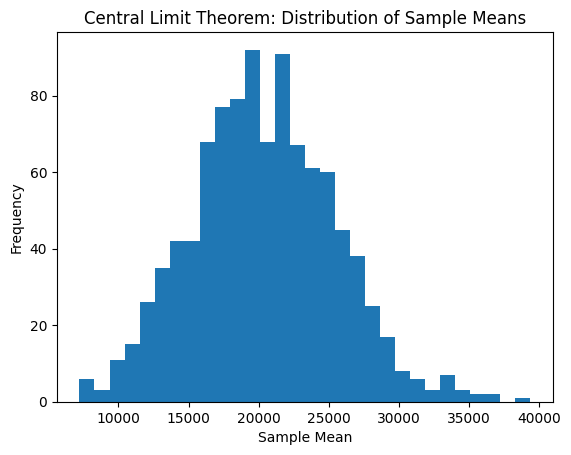

In [12]:
# Central Limit Theorem(CLT): 1000 samples of size 30 and calculate means
sample_means = [df['Close'].sample(30).mean() for _ in range(1000)]

# Plot histogram of sample means
plt.hist(sample_means, bins=30)
plt.title("Central Limit Theorem: Distribution of Sample Means")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()


In [13]:
# Confidence Interval

confidence_level = 0.95  # 95% confidence
mean_close = df['Close'].mean()
std_error = df['Close'].sem()  # Standard error of the mean

# Calculate Confidence Interval using t-distribution
ci_lower = mean_close - stats.t.ppf(1 - (1 - confidence_level) / 2, df['Close'].shape[0] - 1) * std_error
ci_upper = mean_close + stats.t.ppf(1 - (1 - confidence_level) / 2, df['Close'].shape[0] - 1) * std_error

print(f"Confidence Interval for Mean of Close Price: ({ci_lower:.2f}, {ci_upper:.2f})")


Confidence Interval for Mean of Close Price: (20167.63, 20209.23)


In [14]:
# Hypothesis Testing (T-test) for Close Price
population_mean = 10000 

# T-Test
t_stat, p_value = stats.ttest_1samp(df['Close'], population_mean)
print(f"T-Statistic: {t_stat:.2f}, P-Value: {p_value:.4f}")

# Check if p-value is less than 0.05 (significance level)
if p_value < 0.05:
    print("Reject the null hypothesis: The mean of Close price is significantly different from 10,000.")
else:
    print("Fail to reject the null hypothesis: No significant difference from 10,000.")


T-Statistic: 959.95, P-Value: 0.0000
Reject the null hypothesis: The mean of Close price is significantly different from 10,000.


In [15]:
#Z-Score for 'Close' price values
z_scores = (df['Close'] - df['Close'].mean()) / df['Close'].std()
print("Z-scores for Close price:\n", z_scores.head())


Z-scores for Close price:
 0   -0.71
1   -0.71
2   -0.71
3   -0.71
4   -0.71
Name: Close, dtype: float64


#### Plots (Visualizations)


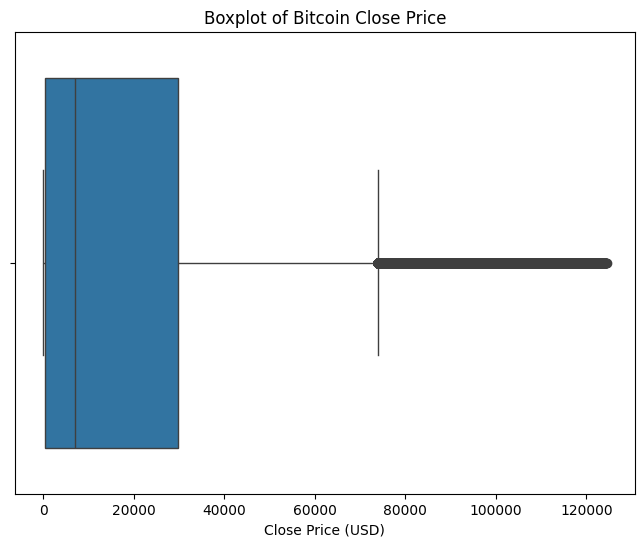

In [17]:
# Boxplot for Close price
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Close'])
plt.title("Boxplot of Bitcoin Close Price")
plt.xlabel("Close Price (USD)")
plt.show()


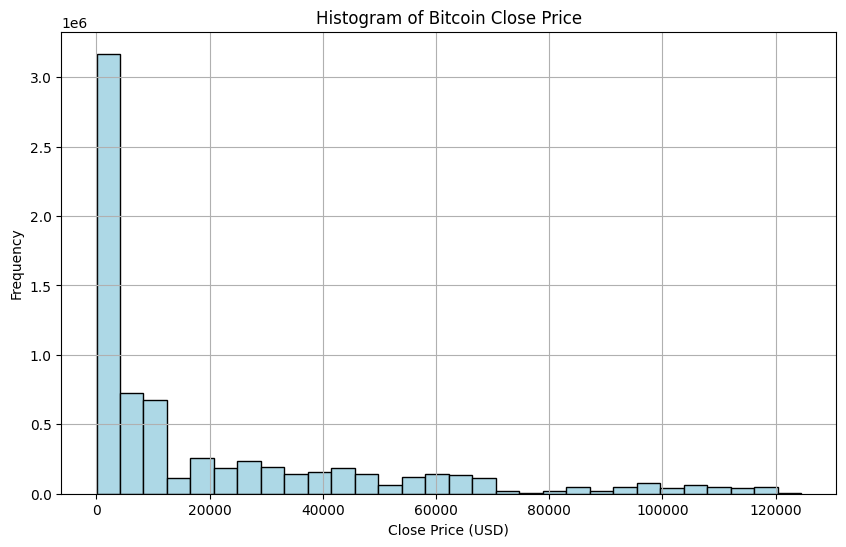

In [18]:
# Histogram for Close price distribution
plt.figure(figsize=(10, 6))
df['Close'].hist(bins=30, edgecolor='black', color='lightblue')
plt.title("Histogram of Bitcoin Close Price")
plt.xlabel("Close Price (USD)")
plt.ylabel("Frequency")
plt.show()


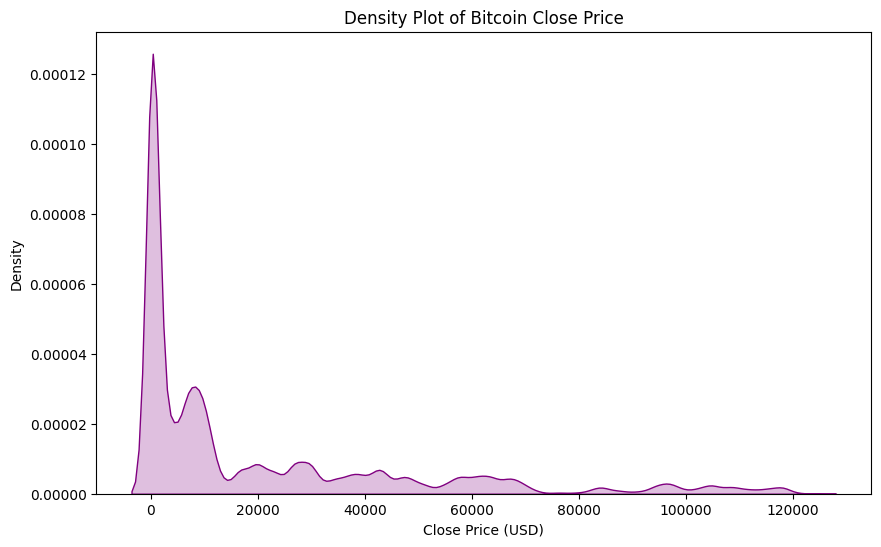

In [19]:
# Density plot for Close price
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Close'], color='purple', fill=True)
plt.title("Density Plot of Bitcoin Close Price")
plt.xlabel("Close Price (USD)")
plt.ylabel("Density")
plt.show()

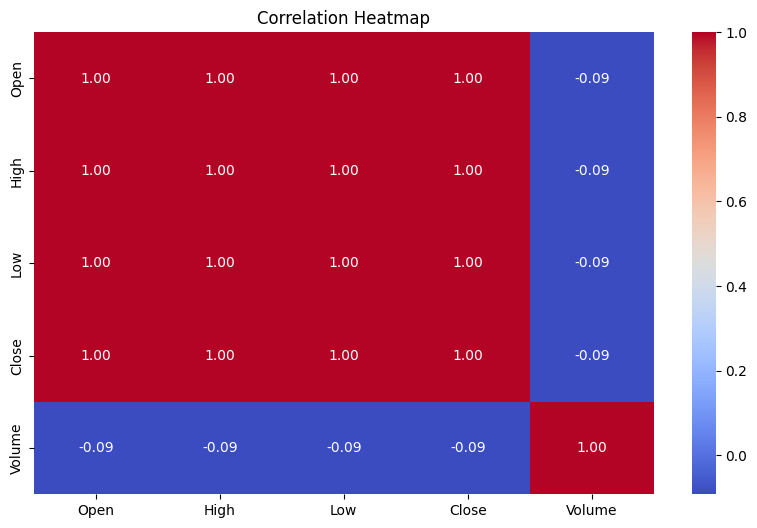

In [21]:
# Correlation heatmap for the dataset
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()
